<a href="https://colab.research.google.com/github/alexanderportilla96/Sy2025II/blob/main/Circuit_RLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:34: SyntaxWarning: invalid escape sequence '\o'
<>:43: SyntaxWarning: invalid escape sequence '\o'
<>:34: SyntaxWarning: invalid escape sequence '\o'
<>:43: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-2992367413.py:34: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("Frecuencia $\omega$ [rad/s]")
/tmp/ipython-input-2992367413.py:43: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("Frecuencia $\omega$ [rad/s]")


Numerador: [1.0]
Denominador: [2.16e-05, 0.12000000000000001, 1.0]
Ceros del sistema: []
Polos del sistema: [-5547.20968458    -8.34587097]


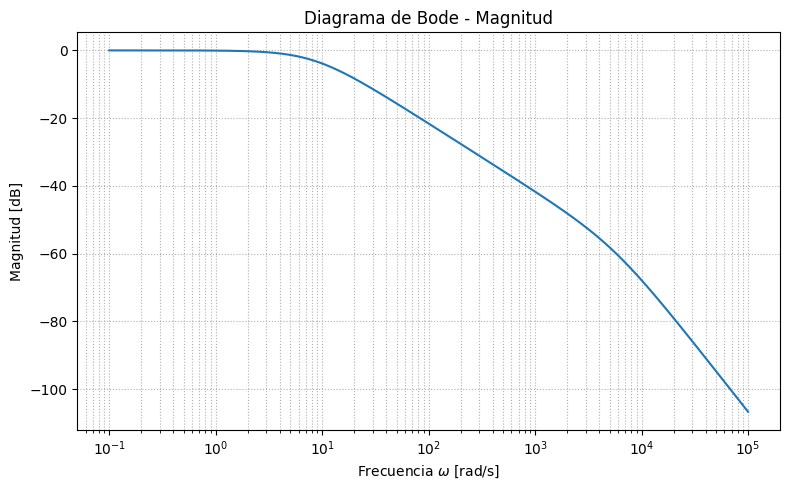

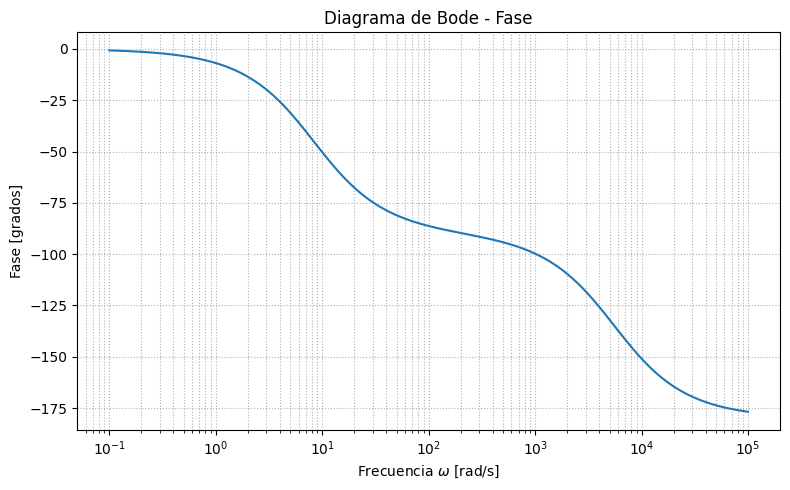

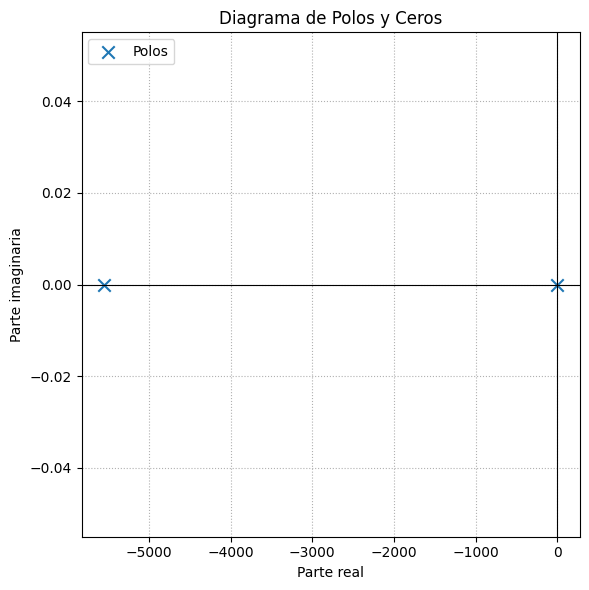

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del circuito
R = 1_000          # ohmios
L = 0.18           # henrios (180 mH)
C = 120e-6         # faradios (120 uF)

# Coeficientes del denominador: LC s^2 + RC s + 1
LC = L * C
RC = R * C

num = [1.0]                       # numerador = 1
den = [LC, RC, 1.0]               # denominador = [LC, RC, 1]

print("Numerador:", num)
print("Denominador:", den)

# Crear la función de transferencia continua
sistema = signal.TransferFunction(num, den)

# Rango de frecuencias (rad/s) para el Bode
w = np.logspace(-1, 5, 1000)      # de 10^-1 a 10^5 rad/s

# Obtener magnitud y fase
w, mag, phase = signal.bode(sistema, w=w)

# --- Diagrama de Bode: Magnitud ---
plt.figure(figsize=(8, 5))
plt.semilogarithmic = True
plt.semilogx(w, mag)
plt.title("Diagrama de Bode - Magnitud")
plt.xlabel("Frecuencia $\omega$ [rad/s]")
plt.ylabel("Magnitud [dB]")
plt.grid(True, which="both", ls=":")
plt.tight_layout()

# --- Diagrama de Bode: Fase ---
plt.figure(figsize=(8, 5))
plt.semilogx(w, phase)
plt.title("Diagrama de Bode - Fase")
plt.xlabel("Frecuencia $\omega$ [rad/s]")
plt.ylabel("Fase [grados]")
plt.grid(True, which="both", ls=":")
plt.tight_layout()

# --- Cálculo de polos y ceros ---
# Ceros: raíces del numerador
ceros = np.roots(num)
# Polos: raíces del denominador
polos = np.roots(den)

print("Ceros del sistema:", ceros)
print("Polos del sistema:", polos)

# --- Diagrama polos-ceros ---
plt.figure(figsize=(6, 6))
# Eje real e imaginario
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)

# Graficar polos (X) y ceros (O)
if len(ceros) > 0:
    plt.scatter(ceros.real, ceros.imag, marker='o', s=60, label="Ceros")
plt.scatter(polos.real, polos.imag, marker='x', s=80, label="Polos")

plt.title("Diagrama de Polos y Ceros")
plt.xlabel("Parte real")
plt.ylabel("Parte imaginaria")
plt.grid(True, ls=":")
plt.legend()
plt.tight_layout()

plt.show()

<>:78: SyntaxWarning: invalid escape sequence '\O'
<>:78: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipython-input-1588985975.py:78: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f"Diagrama de Bode (R={valores[R]} $\Omega$)")


--- ANÁLISIS SIMBÓLICO ---
Función de Transferencia H(s):
        1         
──────────────────
     2            
C⋅L⋅s  + C⋅R⋅s + 1

--- CÁLCULOS NUMÉRICOS CON SYMPY ---
H(s) con valores:
           1           
───────────────────────
         2             
2.16e-5⋅s  + 0.12⋅s + 1

Polos calculados por SymPy: [-5547.20968458100, -8.34587097455187]

Respuesta al impulso en el tiempo h(t):
                 -2777.77777777778⋅t                              
16.716892797605⋅ℯ                   ⋅sinh(2769.43190680323⋅t)⋅θ(t)


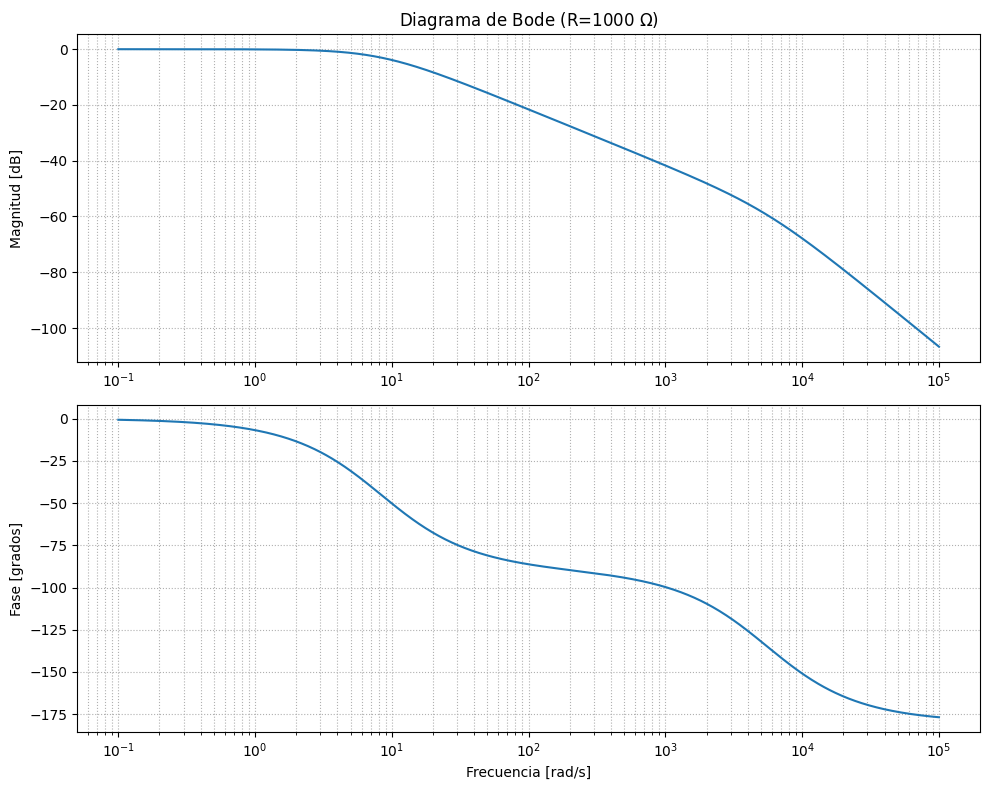

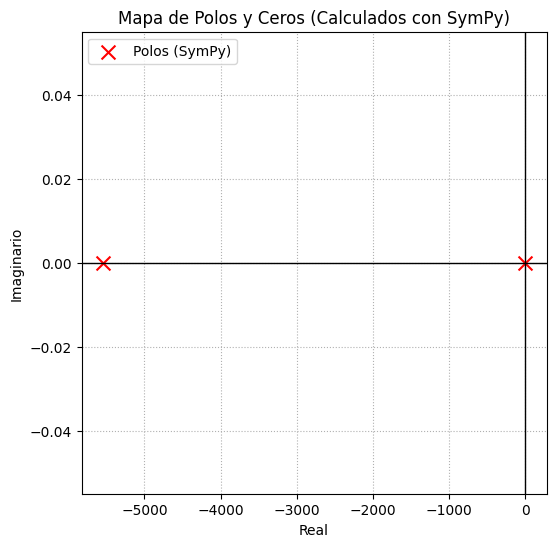

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ==========================================
# PARTE 1: ANÁLISIS SIMBÓLICO
# ==========================================

# 1. Definir las variables
s, t = sp.symbols('s t')
R, L, C = sp.symbols('R L C', real=True, positive=True)

# 2. Definir H(s)
numerador_sym = 1
denominador_sym = (L * C * s**2) + (R * C * s) + 1
H_s = numerador_sym / denominador_sym

print("--- ANÁLISIS SIMBÓLICO ---")
print("Función de Transferencia H(s):")
sp.pprint(H_s)

# 3. Calcular polos simbólicos
polos_simbolicos = sp.solve(denominador_sym, s)

# ==========================================
# PARTE 2: SUSTITUCIÓN NUMÉRICA
# ==========================================

valores = {
    R: 1000,      # Ohmios
    L: 0.18,      # Henrios
    C: 120e-6     # Faradios
}

print("\n--- CÁLCULOS NUMÉRICOS CON SYMPY ---")

# 1. Calcular H(s) con números
H_s_num = H_s.subs(valores)
print("H(s) con valores:")
sp.pprint(H_s_num)

# 2. Calcular los polos numéricos exactos y convertirlos a float
polos_num = [p.subs(valores).evalf() for p in polos_simbolicos]
print(f"\nPolos calculados por SymPy: {polos_num}")

# 3. Respuesta al impulso h(t)
try:
    print("\nRespuesta al impulso en el tiempo h(t):")
    h_t = sp.inverse_laplace_transform(H_s_num, s, t)
    sp.pprint(h_t)
except Exception as e:
    print("No se pudo calcular la inversa simbólica fácilmente:", e)


# ==========================================
# PARTE 3: GRÁFICAS (Usando Scipy/Numpy)
# ==========================================

# Extraemos coeficientes para Scipy
LC_val = float((L*C).subs(valores))
RC_val = float((R*C).subs(valores))

num_scipy = [1.0]
den_scipy = [LC_val, RC_val, 1.0]

sistema = signal.TransferFunction(num_scipy, den_scipy)

# Bode
w = np.logspace(-1, 5, 1000)
w, mag, phase = signal.bode(sistema, w=w)

# --- Gráficas Bode ---
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.title(f"Diagrama de Bode (R={valores[R]} $\Omega$)")
plt.ylabel("Magnitud [dB]")
plt.grid(True, which="both", ls=":")

plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Fase [grados]")
plt.grid(True, which="both", ls=":")

plt.tight_layout()

# --- Mapa de Polos y Ceros ---
plt.figure(figsize=(6, 6))
plt.axhline(0, color="black", lw=1)
plt.axvline(0, color="black", lw=1)

# CORRECCIÓN: Convertir a complex de Python para graficar
re_vals = [complex(p).real for p in polos_num]
im_vals = [complex(p).imag for p in polos_num]

plt.scatter(re_vals, im_vals, marker='x', s=100, color='red', label='Polos (SymPy)')
plt.title("Mapa de Polos y Ceros (Calculados con SymPy)")
plt.xlabel("Real")
plt.ylabel("Imaginario")
plt.grid(True, ls=":")
plt.legend()

plt.show()